# Instroduction:



Linear Regression is a technique that estimates the linear relationship between a continuous dependent variable and one or more independent variables.This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be classified into two types – 

1. **Simple Linear Regression**: Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. 

2. **Multiple Linear Regression**: Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

### Goal of the project:

* To find out if there is any correlation between car's price and engine size two variables.
* Create a simple and a multiple linear regression model to predict car's price based on other variables.
* Find the equation of the regression (best fit) line.
* Evaluate the performances of these models and choose the one with higher score.

### Steps to build Linear Regression Models:

The following steps are taken for both the models.

1. Import the required packages, functions, and classes
2. Load data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with existing data
4. Predicting the test result
5. Testing the performance of the model by calculating evaluation matrices.

### Data Preprocessing

In [1]:
# loading the required packages
# operational packages
import pandas as pd
import numpy as np

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# modeling packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
cars = pd.read_csv(r'C:\Users\Dell\Desktop\Projects\car price prediction\car_price_prediction_dataset.csv')
pd.set_option('display.max_columns', None)

cars.sample(10)

,symboling,normalized_losses,car_company,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,Unnamed: 26,Unnamed: 27
27,1,148.0,Dodge,gas,turbo,NaN,Sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,NaN,NaN
149,0,85.0,Subaru,gas,turbo,four,Wagon,4wd,front,96.9,173.6,65.4,54.9,2650,ohcf,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,23,23,11694.0,NaN,NaN
121,1,154.0,Plymouth,gas,std,four,Sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0,NaN,NaN
147,0,89.0,Subaru,gas,std,four,Wagon,fwd,front,97.0,173.5,65.4,53.0,2455,ohcf,four,108,mpfi,3.62,2.64,9.0,94.0,5200.0,25,31,10198.0,NaN,NaN
26,1,148.0,Dodge,gas,std,four,Sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0,NaN,NaN
135,2,104.0,Saab,gas,std,four,Sedan,fwd,front,99.1,186.6,66.5,56.1,2758,ohc,four,121,mpfi,3.54,3.07,9.3,110.0,5250.0,21,28,15510.0,NaN,NaN
174,-1,65.0,Toyota,diesel,turbo,four,Sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73.0,4500.0,30,33,10698.0,NaN,NaN
20,0,81.0,Chevrolet,gas,std,four,Sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6575.0,NaN,NaN
51,1,104.0,Mazda,gas,std,two,Hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0,NaN,NaN
105,3,194.0,Nissan,gas,turbo,two,Hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,NaN,NaN


### Exploratory Data Analysis

In [3]:
# dropping the last 2 unwanted columns
cars=cars.drop(['Unnamed: 26','Unnamed: 27'],axis=1)
cars.head()

,symboling,normalized_losses,car_company,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,Alfa-Romero,gas,std,two,Convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,Alfa-Romero,gas,std,two,Convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,Alfa-Romero,gas,std,two,Hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,Audi,gas,std,four,Sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,Audi,gas,std,four,Sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
# looking at the shape(rows, columns) of the dataframe
cars.shape

(205, 26)

In [7]:
# getting the general information about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   car_company        205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_of_doors        203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_of_cylinders    205 non-null    object 
 16  engine_size        205 non

Since there are null values in 'price' column, we need to remove them later while building linear regression model.

In [9]:
# descriptive statistics for numerical columns
cars.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# descriptive statistics for categorical variables
cars.describe(include='object')

,car_company,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,engine_type,no_of_cylinders,fuel_system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,Toyota,gas,std,four,Sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


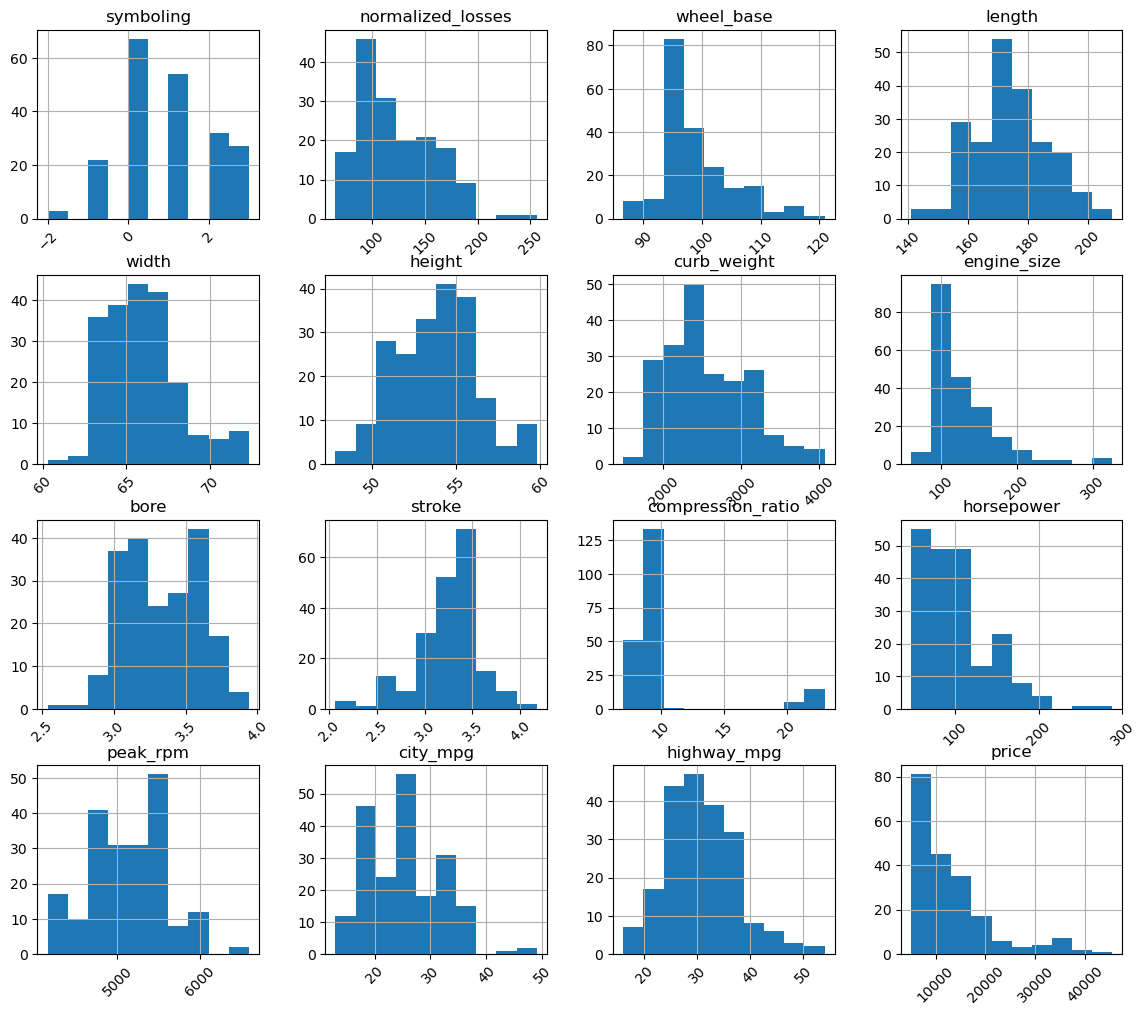

In [16]:
# distribution of the numerical variables

cars.hist(figsize=(14,12), xrot=45)
plt.show()

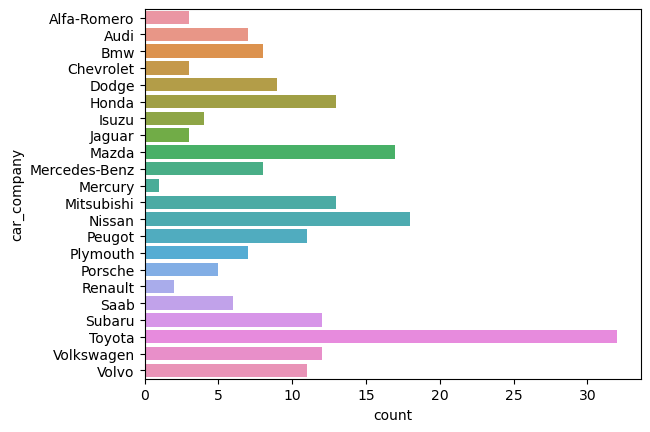

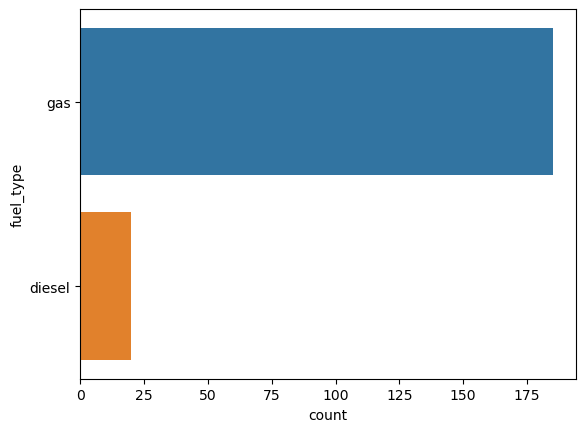

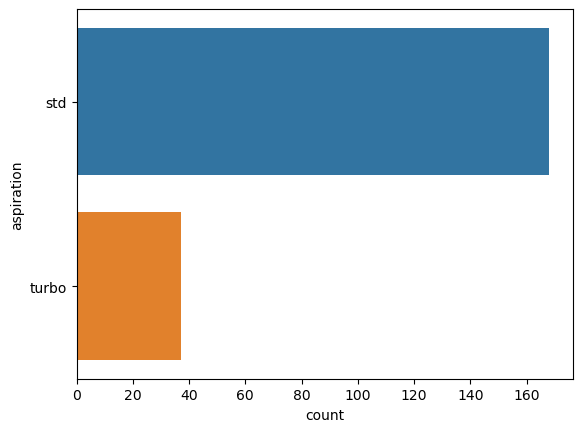

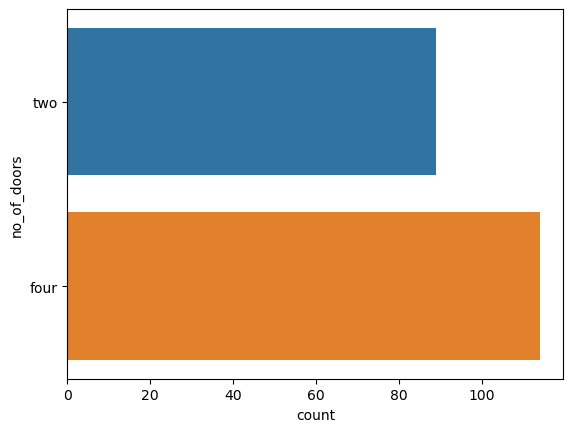

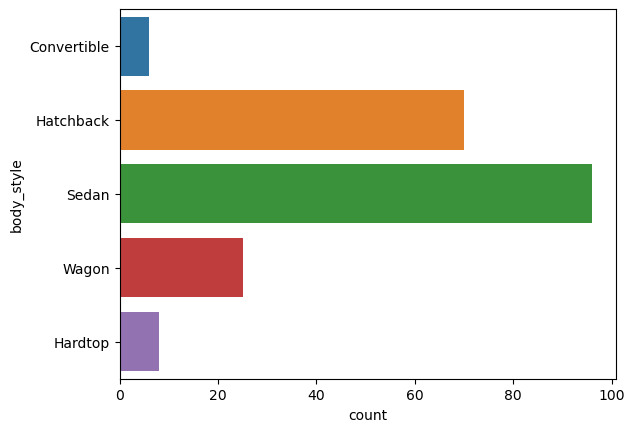

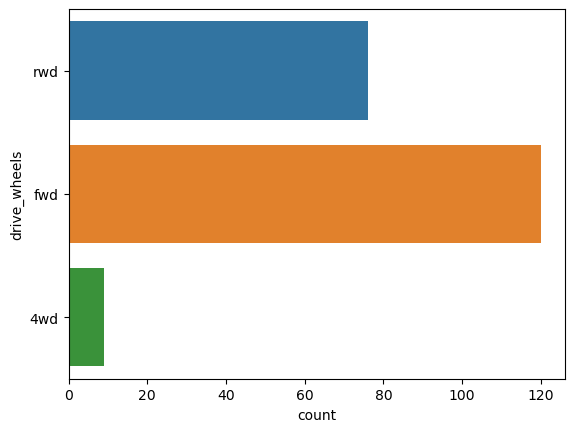

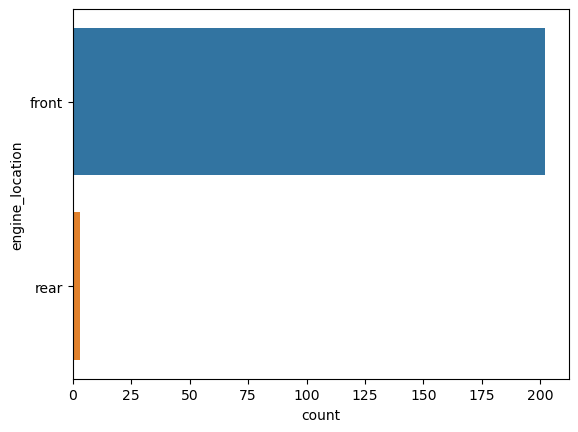

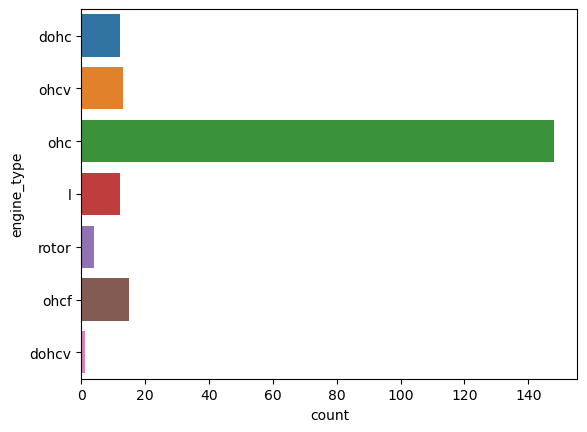

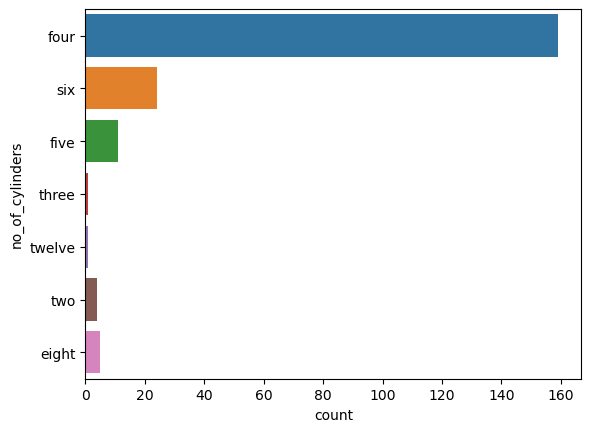

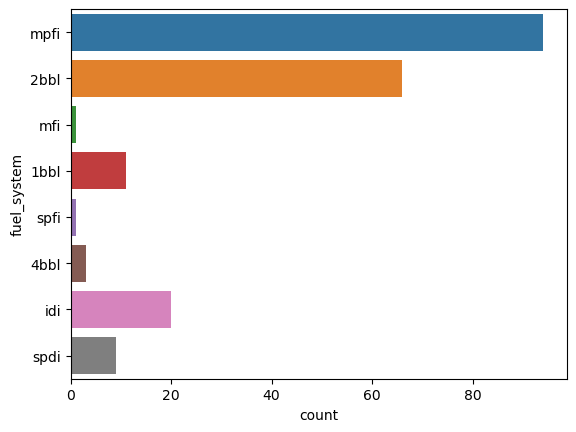

In [18]:
# Visualization for categorical variables

for column in cars.select_dtypes(include='object'):
    sns.countplot(y=column, data=cars)
    plt.show()

In [4]:
# correlation matrix
corr=cars.corr()

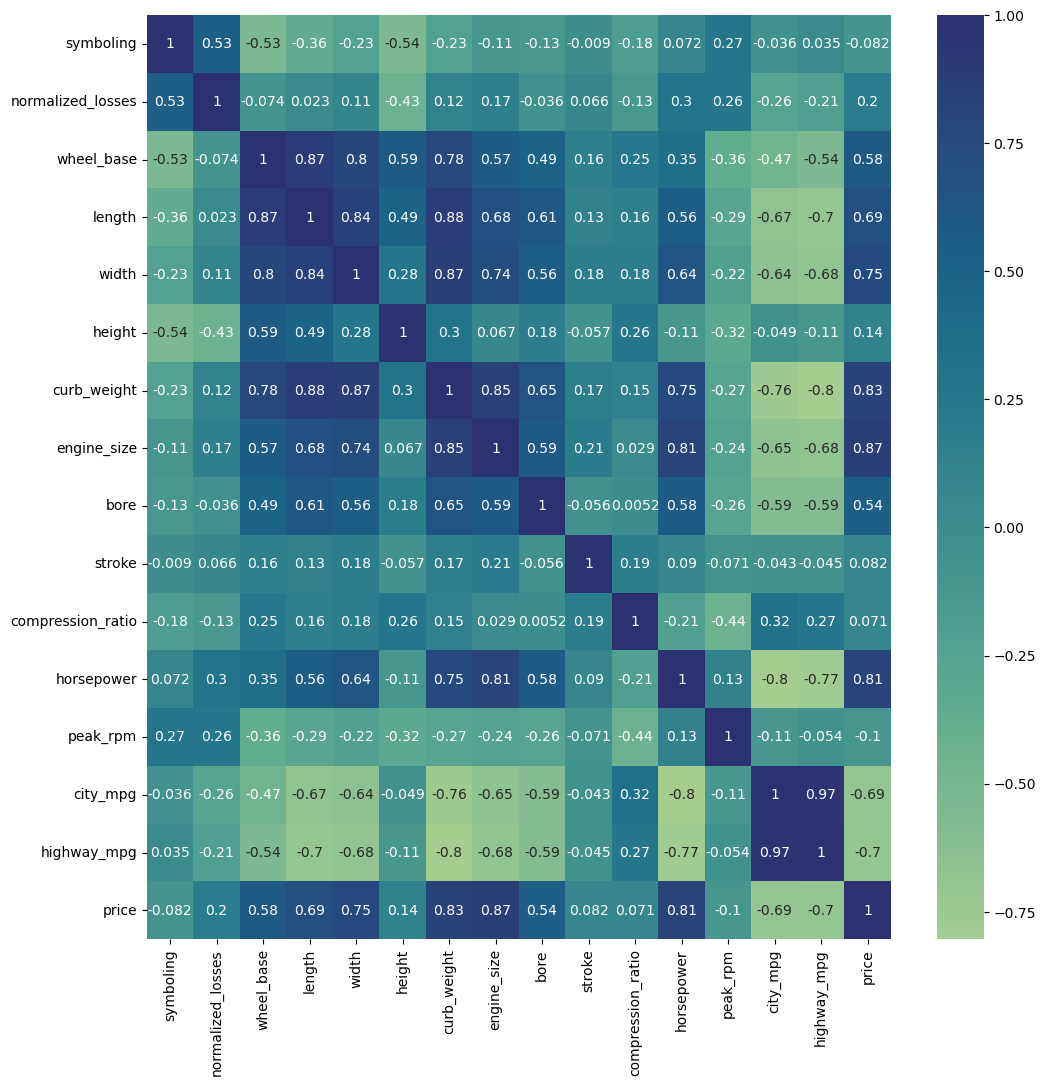

In [5]:
# Heat map for numerical variable
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='crest', annot=True)
plt.show()

## Removing the outliers

Text(0.5, 1.0, 'Boxplot for price')

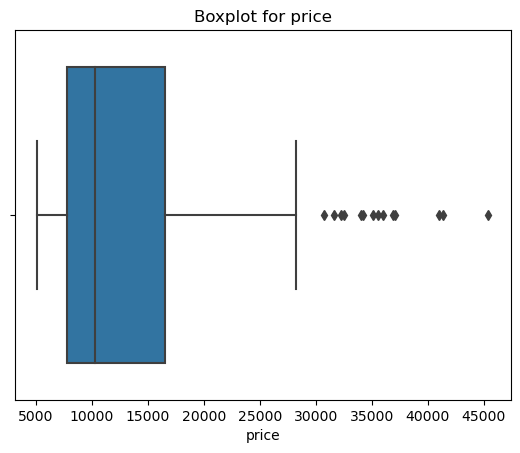

In [7]:
# checking for outliers in 'price'
sns.boxplot(data=cars, x='price')
plt.title('Boxplot for price')

Text(0.5, 1.0, 'Boxplot for engine size')

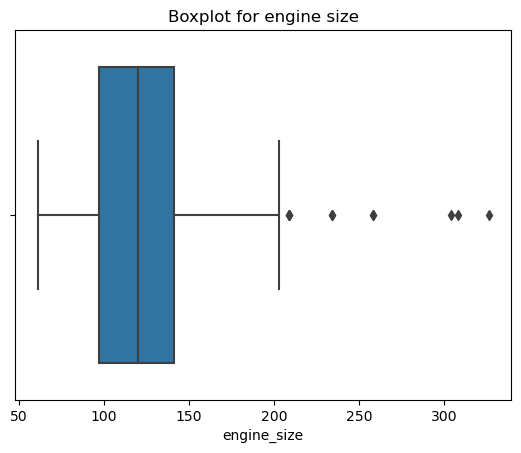

In [6]:
# checking for outliers in 'price'
sns.boxplot(data=cars, x='engine_size')
plt.title('Boxplot for engine size')

Since the normal distribution curve of 'price' column is affected by these outliers, we should remove them along with the null values in 'price' column.

In [6]:
# keeping only the prices under 30000 and engine size under 200
cars_new=cars[(cars['price']<=30000)|(cars['engine_size'] <=200)]
cars_new.shape

(194, 26)

In [7]:
# looking for null values in cars_new dataframe
cars_new['price'].isnull().sum()

3

In [10]:
cars_new.isna().sum()

symboling             0
normalized_losses    32
car_company           0
fuel_type             0
aspiration            0
no_of_doors           2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
no_of_cylinders       0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 3
dtype: int64

In [8]:
# removing the null values
cars_new = cars_new.dropna(axis=0)

In [9]:
# checking for the null values
cars_new.isna().sum()

symboling            0
normalized_losses    0
car_company          0
fuel_type            0
aspiration           0
no_of_doors          0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
no_of_cylinders      0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Since we'll create a simple linear regression model assuming all other variables constant, we'll create a dataframe with only our required columns i.e., 'price' and 'engine_size'.

In [10]:
# linear regression model dataframe
df_lr= cars_new[['price','engine_size']]
df_lr.head()

,price,engine_size
3,13950.0,109
4,17450.0,136
6,17710.0,136
8,23875.0,131
10,16430.0,108


In [14]:
# checking the final rows and column numbers 
df_lr.shape

(157, 2)

# 1. Simple Linear Regression

The first modeling technique is simple linear regression where we have only 2 variables, namely -

* **Dependent/Predictor variable (y)** : 'price'
* **Independent/Feature variable (x)** : 'engine_size'

We'll build a simple linear regression model to find the best fitted line and check whether this model is good enough to predict the price of cars based on their engine size.

But in order to build this model, we have to first check the model assumptions. 

## Assumptions of Linear Regression Model:

1. **Linear relationship**: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. **Independence**: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.Since each row has data on a different car, we have no reason to believe that one car's price  is related to any other cars.

3. **Homoscedasticity**: The residuals have constant variance at every level of x. 

4. **Normality**: The residuals of the model are normally distributed.

Homoscedasticity and Normality assumptions can only be verified after building the models.

### Checking the Linearity assumption:

Text(0, 0.5, 'Engine size')

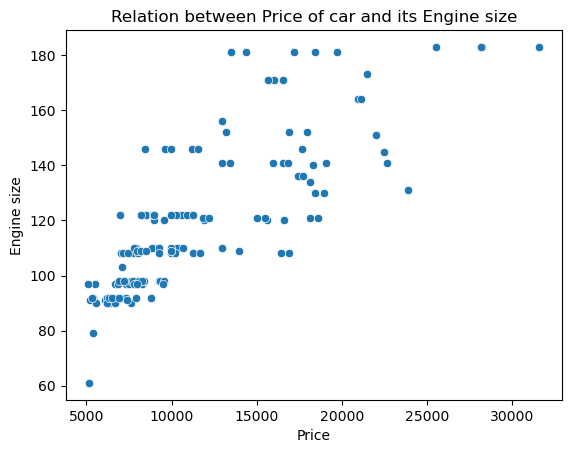

In [11]:
# scatterplot for price and engine price
sns.scatterplot(data=df_lr, x='price',y='engine_size')
plt.title('Relation between Price of car and its Engine size')
plt.xlabel('Price')
plt.ylabel('Engine size')

Clearly we can observe from this scatterplot, 'price' and 'engine size' have a linear relationship. So the linearity assumption holds good.

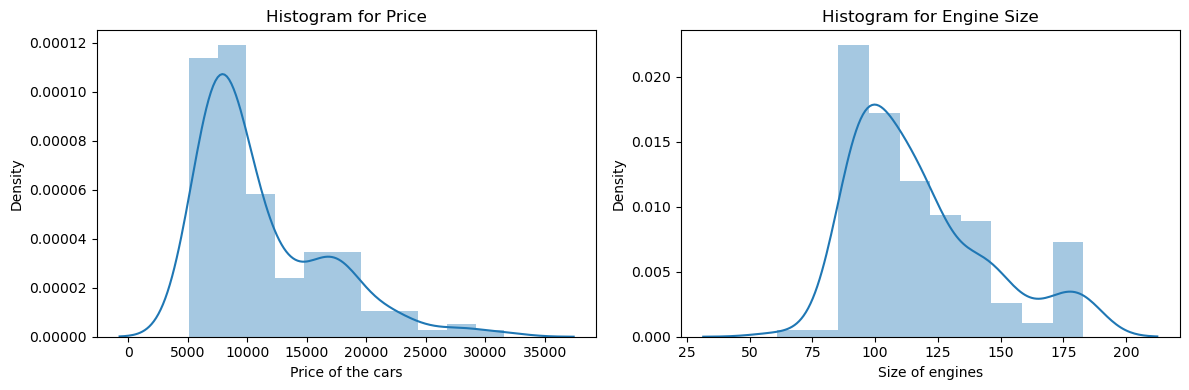

In [30]:
# distribution of price column

fig, axes=plt.subplots(1,2,figsize=(12,4))
sns.distplot(df_lr['price'], ax=axes[0])
axes[0].set_xlabel('Price of the cars')
axes[0].set_title('Histogram for Price')


sns.distplot(df_lr['engine_size'],ax=axes[1])
axes[1].set_xlabel('Size of engines')
axes[1].set_title('Histogram for Engine Size')

plt.tight_layout()
plt.show()

From the histogram for prices we can clearly see that it is left skewed histogram, meaning it is not normally distributed. The engine size is moderately normally distributed. Since this is a small dataframe, we'll go ahead with our analysis.

### Building the model

In [13]:
# declaring feature and target variables
X= df_lr[['engine_size']]
y= df_lr['price']

In [34]:
# checking the dimensions of X and y
print(X.shape)
print(y.shape)

(157, 1)
(157,)


In [14]:
# Splitting the data into training and testing set
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
# Printing the dimensions of X_train,X_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(117, 1)
(117,)
(40, 1)
(40,)


### Fitting the model to the test data and getting the predictions

In [15]:
# Instantiating the linear regression model
lm = LinearRegression()

# fitting the model into the training set
lm.fit(X_train, y_train)

# Predict on the test data
y_pred = lm.predict(X_test)
X_pred = lm.predict(X_train)

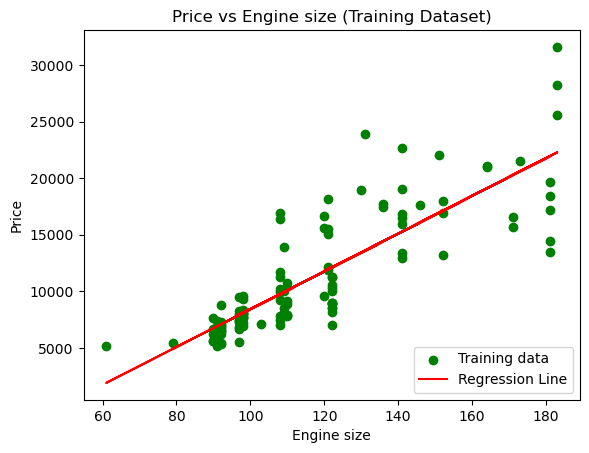

In [38]:
# Visualizing the training data
plt.scatter(X_train, y_train, color="green", label = 'Training data')   
plt.plot(X_train, X_pred, color="red", label = 'Regression Line')    
plt.title("Price vs Engine size (Training Dataset)")  
plt.xlabel("Engine size")  
plt.ylabel("Price")  
plt.legend(loc=4)
plt.show()

### Fitted regression line equation

In [39]:
# Compute model slope and intercept

slope = lm.coef_
intercept = lm.intercept_,
print("Estimated model slope, a:" , slope)
print("Estimated model intercept, b:" , intercept) 

Estimated model slope, a: [167.04082164]
Estimated model intercept, b: (-8294.239066435672,)


The model slope is given by lm.coef_ and model intercept term is given by lm.intercept_.The estimated model slope and intercept values are 167.04082164 and  -8294.23906644.

So, the equation of the fitted regression line is,

y = - 8294.23906644 + 167.04082164 * X 
or, **price** = - 8294.23906644 + 167.04082164 * **engine_size**

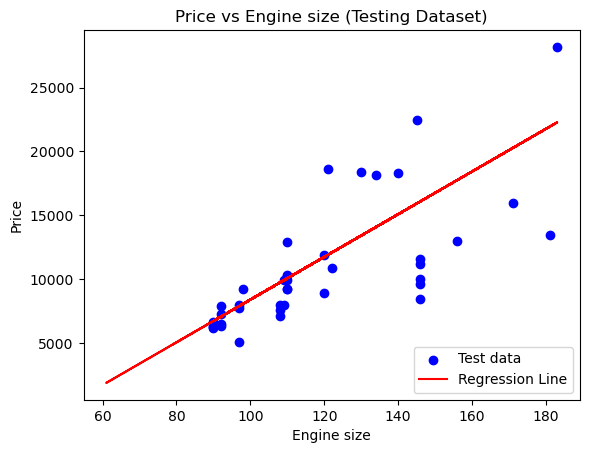

In [40]:
# Visualizing the testing data
plt.scatter(X_test, y_test, color="blue", label='Test data')   
plt.plot(X_train, X_pred, color="red", label='Regression Line')    
plt.title("Price vs Engine size (Testing Dataset)")  
plt.xlabel("Engine size")  
plt.ylabel("Price")
plt.legend(loc=4)
plt.show() 

In [41]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
slr_diff.head()

,Actual value,Predicted value
169,9989.0,16093.720894
69,28176.0,22274.231294
176,10898.0,12084.741174
182,7775.0,7908.720633
154,7898.0,7073.516525


In [39]:
# Residuals for simple linear regression model
residual_slr = y_test - y_pred
residual_slr.head()

169   -6104.720894
69     5901.768706
176   -1186.741174
182    -133.720633
154     824.483475
Name: price, dtype: float64

### Evaluating the model performance

In [42]:
# calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error(MSE):{:.4f} ".format(mse))

# calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

# calculate r2 value (R-squared)
r2_value = r2_score(y_test, y_pred)
print("R2 Value: {:.4f}".format(r2_value))

Mean Squared Error(MSE):12932302.0331 
RMSE value: 3596.1510
R2 Value: 0.4600


The RMSE value has been found to be 3596.1510. It means the standard deviation for our prediction is 3596.1510. So, sometimes we expect the predictions to be off by more than 3596.1510 and other times we expect less than 3596.1510.

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .4600. It means that 46% of the variance in pricecan be explained by engine size of a car. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

### Checking the Homoscedasticity assumption:

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests a better-fit for a non-linear model.

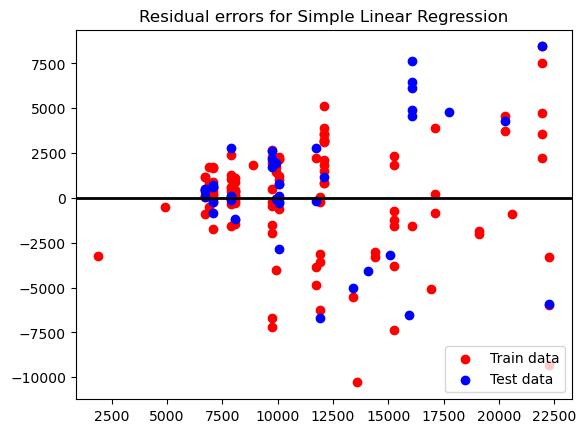

In [20]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.axhline(0, color='black', linewidth=2)
plt.title('Residual errors for Simple Linear Regression')
plt.legend(loc = 4)
plt.show()

### Checking the Normality Assumption:

Text(0.5, 0, 'Residuals')

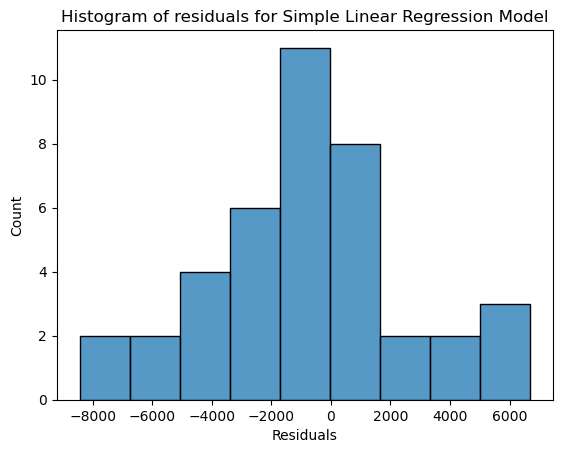

In [45]:
# Residual Histogram
sns.histplot(residual_slr)
plt.title('Histogram of residuals for Simple Linear Regression Model')
plt.xlabel('Residuals')

The residuals are not quite randomly dispersed around the horizontal axis. Some data points are clusterd together in vertical lines. 

### Checking for Overfitting and Underfitting

In [27]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.6968
Test set score: 0.4600


The training set score as 0.6968 and the test set score as 0.4600. The higher the scores the better the model performed. 

We can observe that the training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. 

Underfitting means our model performs poorly on the training data and does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Multiple or Polynomial regression to increase the model complexity.

Therefore, a simple linear regression model does not provide a good fit to the data.

## 2. Multiple Linear Regression Model 

Multiple linear regression is a statistical method we can use to understand the relationship between multiple predictor variables and a response variable.

However, before we perform multiple linear regression, we must first make sure that five assumptions are met:

1. **Linear relationship**: There exists a linear relationship between each predictor variable and the response variable.The response variable (price) is linearly related with the predictor variables.

2. **No Multicollinearity**: None of the predictor variables are highly correlated with each other. We assume for this project, that the predictor variables are not highly correlated.

3. **Independence**: The observations are independent. We have no reason to assume that the observations are dependent on one another.

4. **Homoscedasticity**: The residuals have constant variance at every point in the linear model.

5. **Multivariate Normality**: The residuals of the model are normally distributed.

Homoscedasticity and Multivariate Normality assumptions can only be verified after building the model.

In [43]:
# looking at the shape of the original dataframe
cars_new.shape

(157, 26)

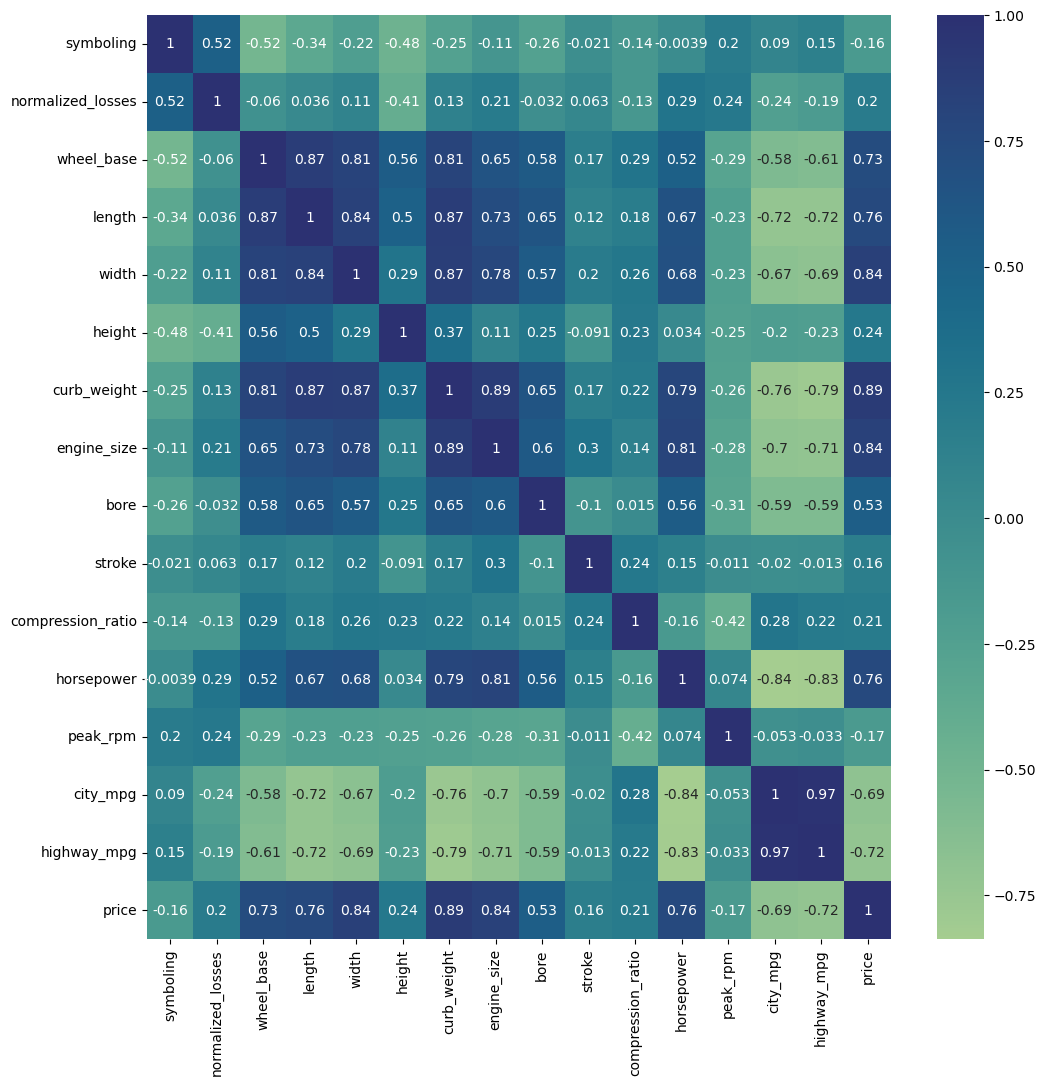

In [31]:
# Heat map for numerical variable
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='crest', annot=True)
plt.show()

For multiple linear regression model, we'll have one predictor variable (y) i.e 'price' and multiple feature variables (X). From the heatmap, we can see 'length','width','curb_weight','engine_size','horsepower', 'highway_mpg' are strongly correlated with 'price'.

In [21]:
# creating a new dataframe for multiple linear regression model
mlr_df=cars_new[['length','width','curb_weight','engine_size','horsepower','highway_mpg','price']]

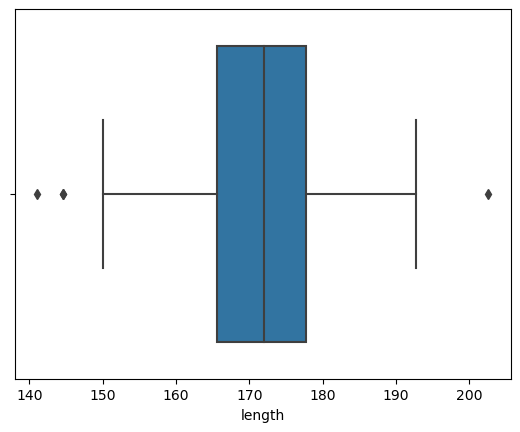

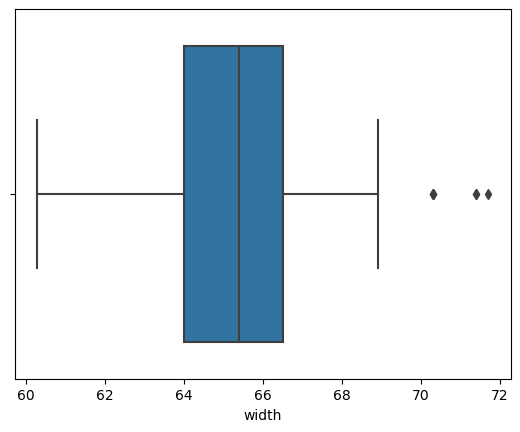

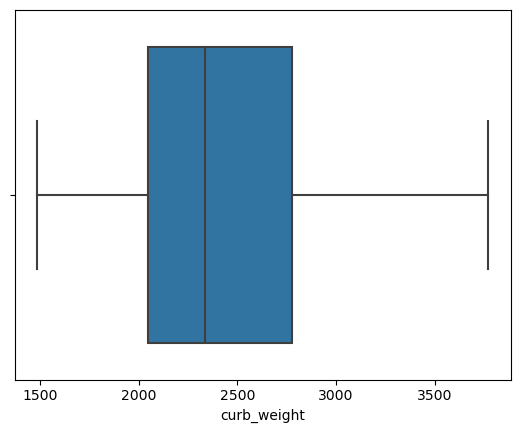

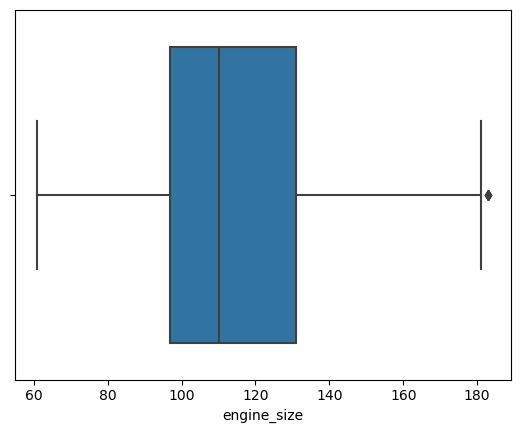

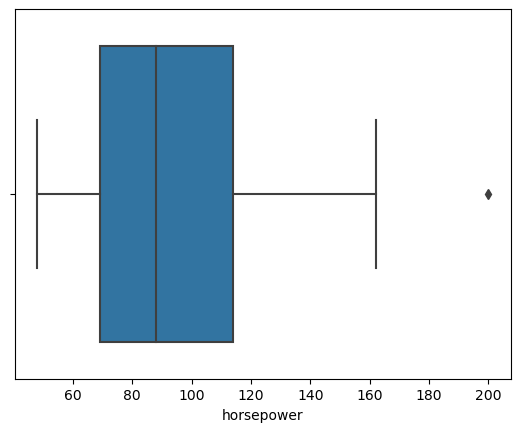

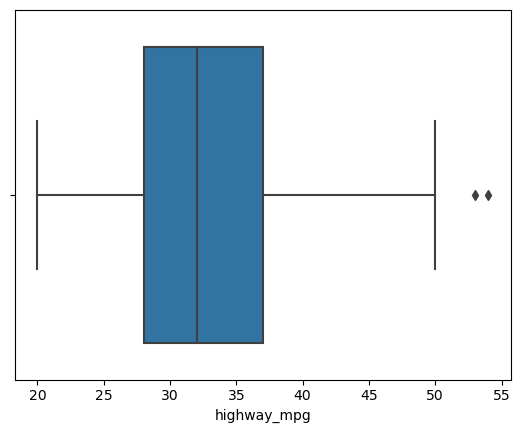

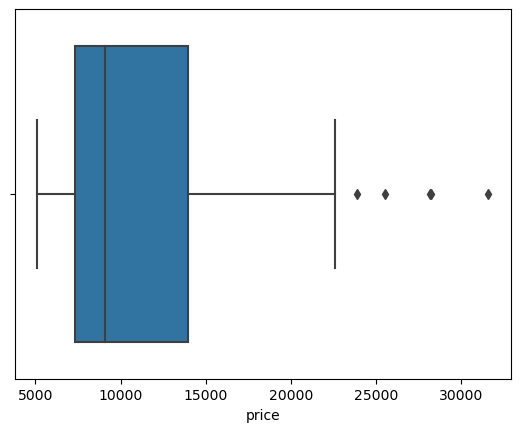

In [59]:
# Checking for outliers
for columns in mlr_df:
    sns.boxplot(data=mlr_df, x=columns)
    plt.show()

In [61]:
# shape of the dataframe before removing the outliers
mlr_df.shape

(157, 7)

In [22]:
# removing the outliers
mlr_final=mlr_df[(mlr_df['length']>=150) & (mlr_df['length']<=200) & (mlr_df['width']<=70) & (mlr_df['engine_size']<=180) & (mlr_df['horsepower']<=180) & (mlr_df['highway_mpg']<=50) & (mlr_df['price']<23000)]

In [46]:
# shape of the dataframe after removing the outliers
mlr_final.shape

(142, 7)

In [47]:
# descriptive statistics
mlr_final.describe()

,length,width,curb_weight,engine_size,horsepower,highway_mpg,price
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,171.658451,65.315493,2389.366197,113.626761,91.598592,32.619718,10438.204225
std,10.140238,1.518365,387.162463,21.513845,26.478162,5.583324,4384.977732
min,150.000000,62.500000,1837.000000,79.000000,52.000000,22.000000,5118.000000
25%,165.375000,64.000000,2042.500000,97.000000,69.000000,29.000000,7311.500000
50%,172.000000,65.300000,2311.500000,109.000000,86.000000,32.000000,8883.000000
75%,176.750000,66.500000,2667.000000,122.000000,110.000000,37.000000,12102.500000
max,188.800000,68.900000,3252.000000,173.000000,162.000000,50.000000,22625.000000


In [48]:
# looking for null values
mlr_final.isnull().sum()

length         0
width          0
curb_weight    0
engine_size    0
horsepower     0
highway_mpg    0
price          0
dtype: int64

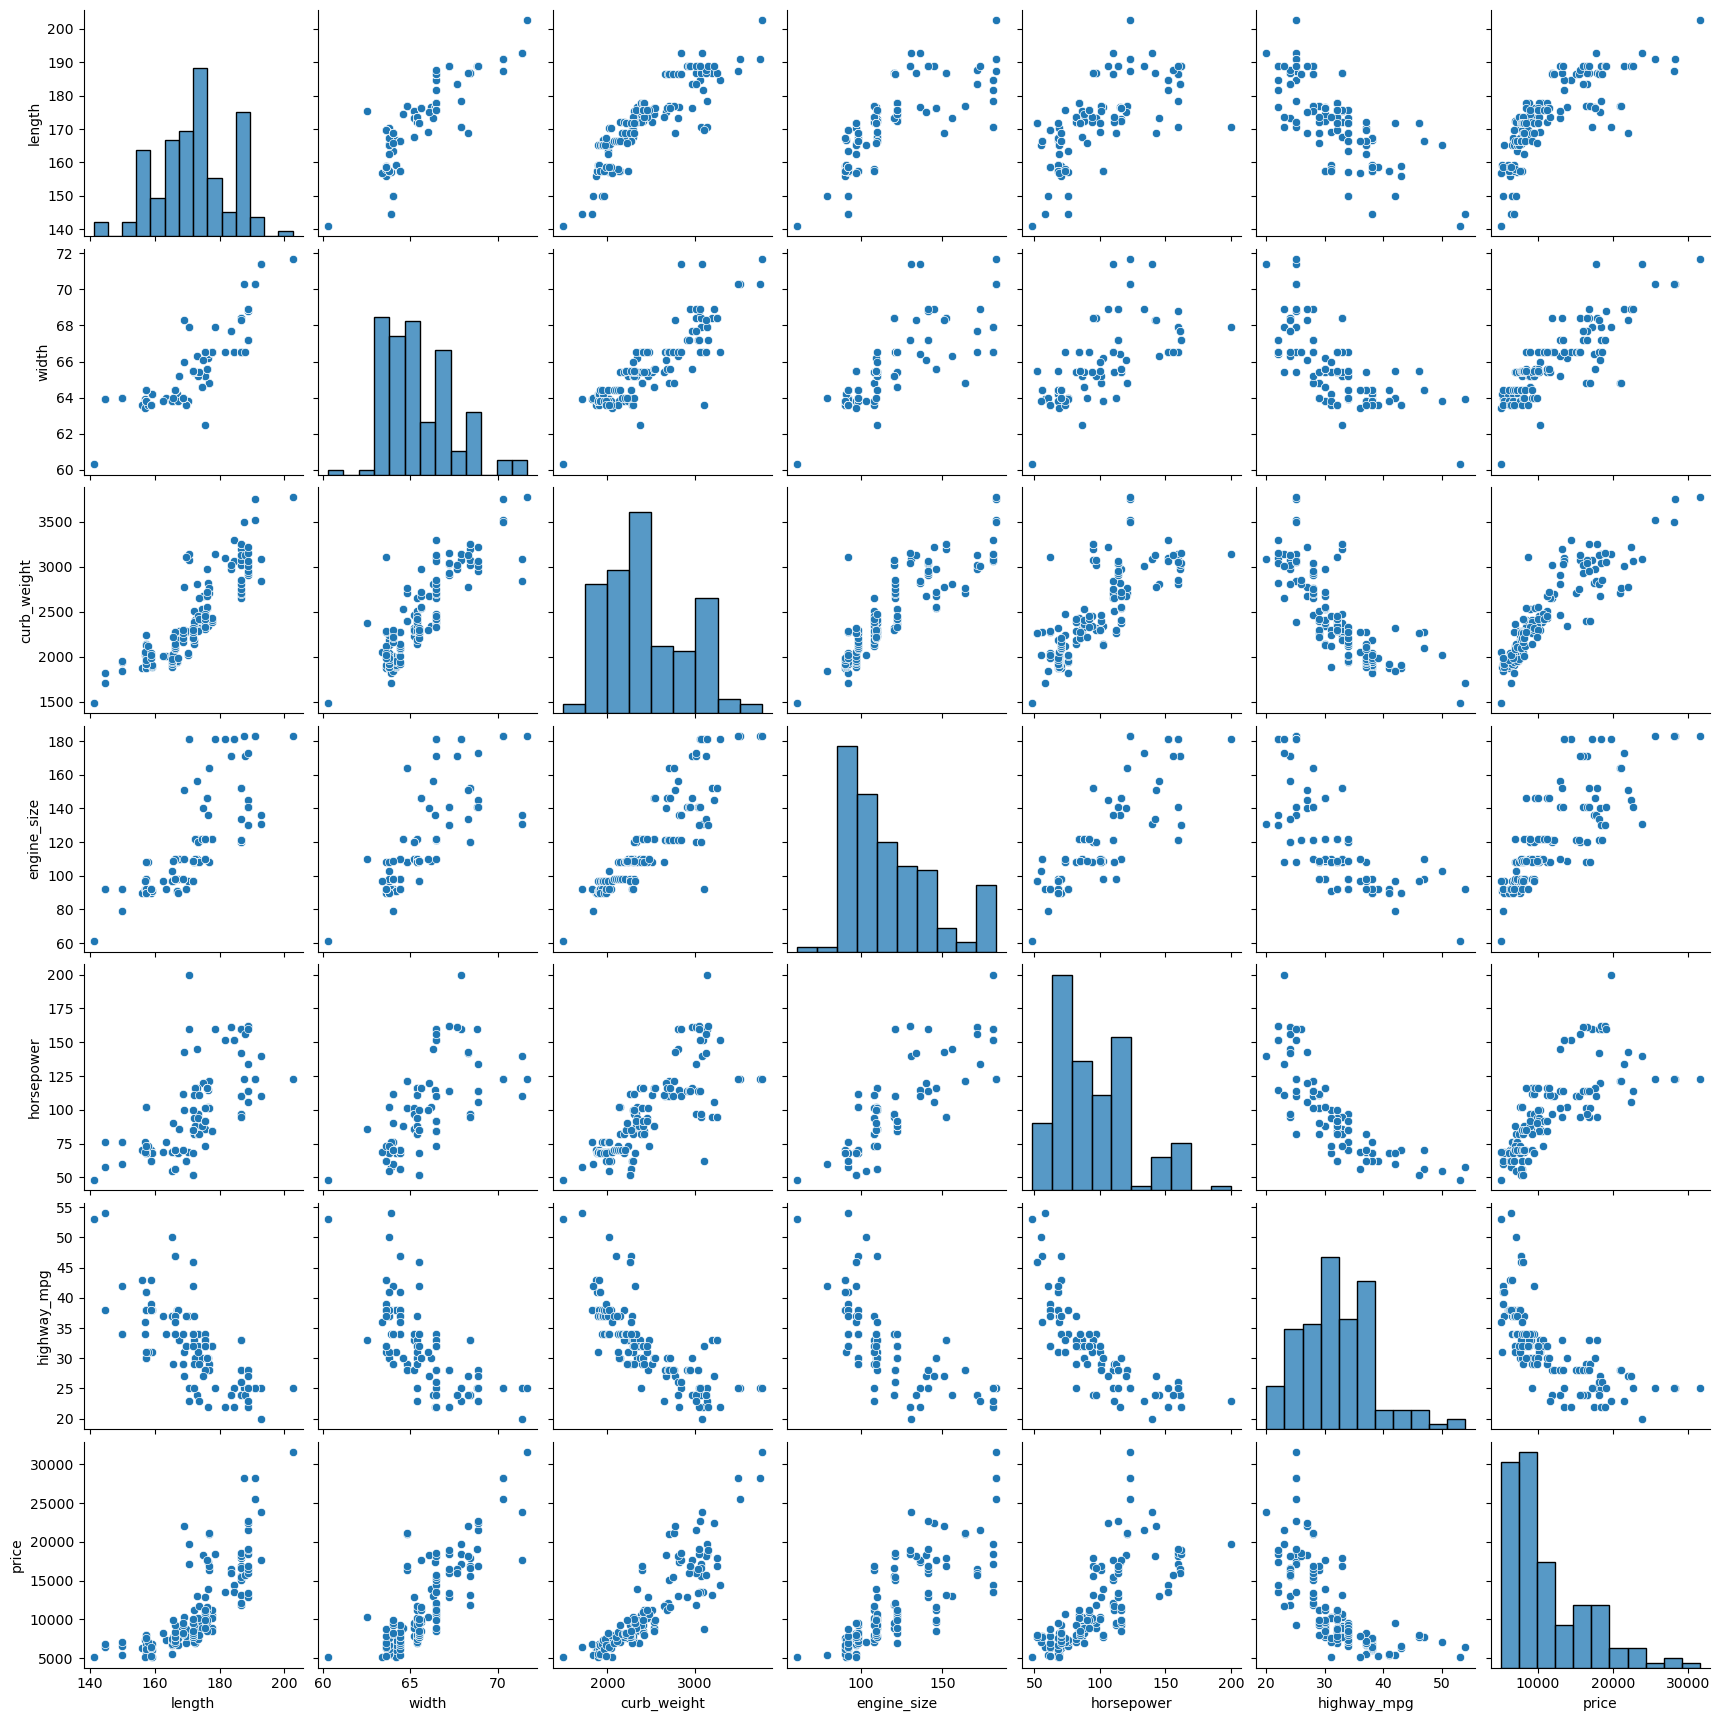

In [56]:
# creating a scatterplot matrix
sns.pairplot(mlr_df)

### Building the model

In [23]:
# declaring feature and target variables
X1= mlr_final[['length','width','curb_weight','engine_size','horsepower','highway_mpg']]
y1= mlr_final['price']

In [51]:
# checking the dimensions of X and y
print(X1.shape)
print(y1.shape)

(142, 6)
(142,)


In [24]:
# Splitting the data into train and test dataset
X1_train,X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.25, random_state=42)

In [53]:
# Printing the dimensions of X1_train,X1_test, y1_train, y1_test
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(106, 6)
(106,)
(36, 6)
(36,)


### Fitting the model to the test data and getting the predictions

In [25]:
# Instantiate the linear regression model
mlr = LinearRegression()

# fitting the model into the training set
mlr.fit(X1_train, y1_train)

# Predict on the test data
y1_pred = mlr.predict(X1_test)
X1_pred = mlr.predict(X1_train)

### Fitted regression line equation

In [60]:
#Intercept and Coefficient
print("Intercept: ",mlr.intercept_)
print("Coefficients:")
list(zip(X1, mlr.coef_))

Intercept:  -18583.606654176663
Coefficients:


[('length', 54.33833148001907),
 ('width', 19.051075515192597),
 ('curb_weight', 5.89685888501377),
 ('engine_size', -1.6711672087138458),
 ('horsepower', 47.29689221637071),
 ('highway_mpg', 3.20818903059793)]

The equation for multiple linear regression model is -

**price** = -18583.60 + 54.34 * **length** + 19.05 * **width** + 5.89 * **curb_weight** - 1.67 * **engine_size** + 47.29 * **horsepower** + 3.21 * **highway_mpg**

In [34]:
# Showing the actual and predicted values of price
mlr_diff = pd.DataFrame({'Actual value': y1_test, 'Predicted value': y1_pred})
mlr_diff.head()

,Actual value,Predicted value
194,12940.0,15373.396106
35,7295.0,6917.126754
139,7053.0,7081.046059
154,7898.0,8234.385431
97,7999.0,7112.222868


In [43]:
# calculating the residuals
residual_mlr = y1_test - y1_pred
residual_mlr.head()

194   -2433.396106
35      377.873246
139     -28.046059
154    -336.385431
97      886.777132
Name: price, dtype: float64

### Evaluating the model performance

In [61]:
# calculate mean squared error (MSE)
mse_mlr = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error(MSE):{:.4f} ".format(mse_mlr))

# calculate root mean squared error (RMSE)
rmse_mlr = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse_mlr))

# calculate r2 value (R-squared)
r2_value_mlr = r2_score(y1_test, y1_pred)
print("R2 Value: {:.4f}".format(r2_value_mlr))

Mean Squared Error(MSE):5637566.7982 
RMSE value: 3596.1510
R2 Value: 0.7561


The RMSE value has been found to be 3596.1510. It means the standard deviation for our prediction is 3596.1510. So, sometimes we expect the predictions to be off by more than 3596.1510 and other times we expect less than 3596.1510.

In business decisions, the benchmark for the R2 score value is 0.7. The R2 score for multiple linear regression model is 0.7561. It means that 75.61% of the variance in price can be explained by length,width,curb weight,engine size,horsepower and highway mpg of car. So, the R2 score value confirms that the model is good enough to deploy because it provides a good fit to the data.


### Checking for Homoscedasticity assumption:

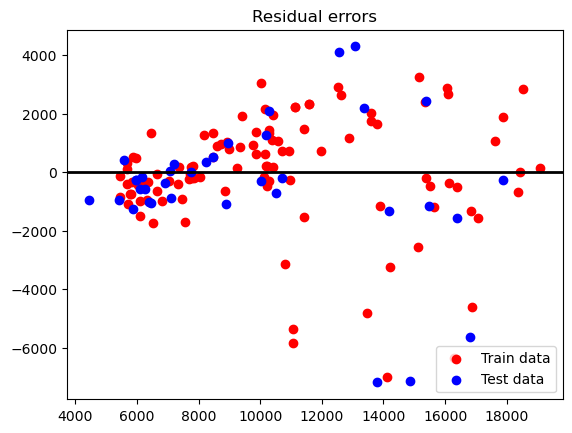

In [26]:
# Plotting residual errors
plt.scatter(mlr.predict(X1_train), y1_train - mlr.predict(X1_train), color = 'red', label = 'Train data')
plt.scatter(mlr.predict(X1_test),  y1_test - mlr.predict(X1_test), color = 'blue', label = 'Test data')
plt.axhline(0, color='black', linewidth=2)
plt.title('Residual errors for Multiple Linear Regression')
plt.legend(loc = 4)
plt.show()

### Checking for Multivariate Normality assumption:

The residuals are not quite randomly dispersed around the horizontal axis. Some data points are clusterd together. But there are no clear pattern so we'll assume that the residuals have a constant variance across the model.

Text(0.5, 0, 'Residuals')

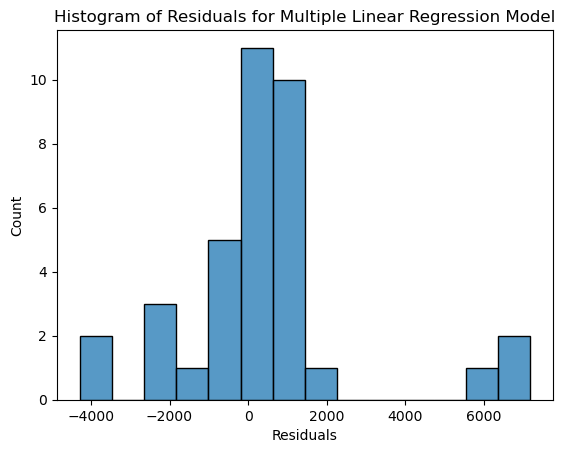

In [44]:
# Plotting the residual histogram
#residuals = mlr.predict(X1_train) - y1_train
sns.histplot(residual_mlr)
plt.title('Histogram of Residuals for Multiple Linear Regression Model')
plt.xlabel('Residuals')

We can see that the residuals are normally distributed. So this assumption is held for multiple linear regression model.

### Checking for Overfitting or Underfitting the data:

In [64]:
print("Training set score: {:.4f}".format(mlr.score(X1_train,y1_train)))
print("Test set score: {:.4f}".format(mlr.score(X1_test,y1_test)))

Training set score: 0.7929
Test set score: 0.7561


The training set score is 0.7929 and the test set score is 0.7561. Both scores are higher than the scores for a simple linear regression model. So, this model learnt the relationships from the training data appropriately. 

Thus, a multiple linear model predicts the price of cars better than a simple linear regression model while holding all other variables constant. 

## Conclusion:

Model Statistics: 

| Matrices | Simple Linear Regression | Multiple Linear Regression |
| :-- | :--- | :--- |
| Regression line equation | **price** = - 8294.23 + 167.04 * **engine_size** | **price** = -18583.60 + 54.34 * **length** + 19.05 * **width** + 5.89 * **curb_weight** - 1.67 * **engine_size** + 47.29 * **horsepower** + 3.21 * **highway_mpg** |
| β0 | - 8294.23 | -18583.60 |
| β1 | 167.04 | [ 54.34, 19.05, 5.89, -1.67, 47.29, 3.21 ] |
| Mean Squared Error(MSE) | 12932302.0331 | 5637566.7982 |
| Root Mean Squared Error | 3596.1510 | 3596.1510 |
| R-squared | 0.4600 | 0.7561 |
| Training set score | 0.6968 | 0.7929 |
| Test set score | 0.4600 | 0.7561 |

Among these two models, clearly **Multiple Linear Regression model performs better than a simple Linear regression model** in correctly predicting the price of cars based on other variables. The Multiple Linear Regression model correctly predicted 75.61% of the test data while the Simple Linear Regression model could only predict 46% of the test data.


## Limitation of the project:

These models aren't perfect. There are certain limitations of these models.
1. The dataset is very small. It couldn't be split into train, test as well as validation set.
2. The data is clearly outdated which reduces its usability.
1. The distribution of price column is not normal. It is right skewed.
2. The homoscedasticity assumption for both the models didn't purely satisfy. 
3. There might be some multicollinearity among the feature variables (e.g. car width, length and curb weight).
4. In the multiple linear model only numerical columns are taken into account.  Some categorical variables (e.g. aspiration, fuel system, engine type etc) can also influence the price of a car.
7. Moreover, When using a regression equation to predict something we can only use values for the predictor variable that are within the range of the predictor variable in the original dataset we used to generate the least squares regression line. This means any values outside the dataset, will not produce correct prediction.